In [1]:
from sympy import *
from sympy.physics.mechanics import *
from IPython.display import display
import util
import math
init_vprinting()

In [2]:
h, r, pi = symbols("h r π")

func = (-r**3/(2*h**3) + (r/h)**2 + h/(2*r) -1)

volume = integrate(4*pi*r**2*func, (r, 0, h))
simplify(volume)


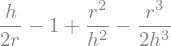

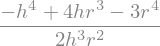

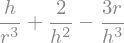

In [3]:
function, gradient, laplacian = util.get_derivatives(func, r)
display(function, gradient, laplacian)

In [6]:
h_value = 2 # don't use 1, casue it can't test case like 1/(h**2)
upper_bound = h_value

s = [(h, h_value), (pi, math.pi), (r, abs(r))]
f = (func/volume).subs(s)
g = (gradient/volume).subs(s)
l = (laplacian/volume).subs(s)

util.sampling(f, g, l, r, upper_bound, h_value, "samples/viscosity.json")

{'h_value': 2,
 'function': [(0.2, 1.1964970206130394),
  (0.4, 0.45836623610465865),
  (0.6000000000000001, 0.22177246601461287),
  (0.8, 0.11280106591638085),
  (1.0, 0.05595290968074447),
  (1.2000000000000002, 0.025464790894703243),
  (1.4000000000000001, 0.009783765921318723),
  (1.6, 0.0026857396646757514),
  (1.8, 0.0003149941582027277)],
 'gradient': [(0.2, -7.432784521990093),
  (0.4, -1.8143663512476065),
  (0.6000000000000001, -0.7595503872661649),
  (0.8, -0.38271790221629204),
  (1.0, -0.20516066882939635),
  (1.2000000000000002, -0.10875587777946176),
  (1.4000000000000001, -0.05302965562395454),
  (1.6, -0.021075595979747033),
  (1.8, -0.004817015928070656)],
 'laplacian': [(0.2, 74.7307061696023),
  (0.4, 9.429930378194799),
  (0.6000000000000001, 2.8451709184327187),
  (0.8, 1.2253687220083036),
  (1.0, 0.6341329763817706),
  (1.2000000000000002, 0.3603091072774851),
  (1.4000000000000001, 0.21004363412515029),
  (1.6, 0.11586915046387497),
  (1.8, 0.05011456766467409)

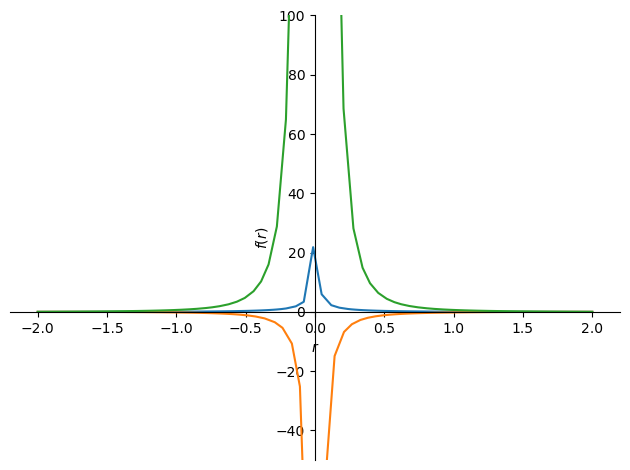

In [5]:
plot(f, g, l, (r, -upper_bound, upper_bound), ylim = (-50, 100))